# Frequency response of some wavelet filters

In [1]:
import math
import numpy as np
from scipy import signal
import pylab
import pywt

In [2]:
# https://matplotlib.org/3.1.1/tutorials/text/usetex.html
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
def get_filter(wavelet_name, coef_index, N):
    wavelet = pywt.Wavelet(wavelet_name)
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=1, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[coef_index] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    return samples

## [Haar](http://wavelets.pybytes.com/wavelet/haar/)

In [4]:
K_0 = get_filter("haar", 0, 2)
K_1 = get_filter("haar", 1, 2)
print("K_0 =", K_0)
print("K_1 =", K_1)

K_0 = [0.70710678 0.70710678]
K_1 = [ 0.70710678 -0.70710678]


In [5]:
w0, scaling_function = signal.freqz(K_0)
w1, wavelet_function = signal.freqz(K_1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


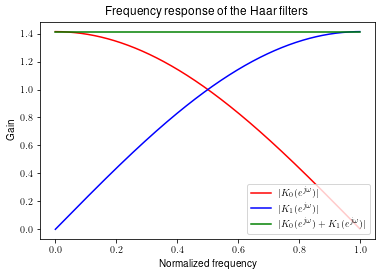

In [6]:
pylab.plot(w0/math.pi, np.abs(scaling_function), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, np.abs(wavelet_function), 'b', label="$|K_1(e^{j\omega})|$")
pylab.plot(w0/math.pi, np.abs(scaling_function + wavelet_function), 'g', label="$|K_0(e^{j\omega})+K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Haar filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Gain")
pylab.savefig("haar_modulus.svg")
pylab.savefig("haar_modulus.pdf")
pylab.show()

In [7]:
angles_sf = np.unwrap(np.angle(scaling_function))
angles_wf = np.unwrap(np.angle(wavelet_function))

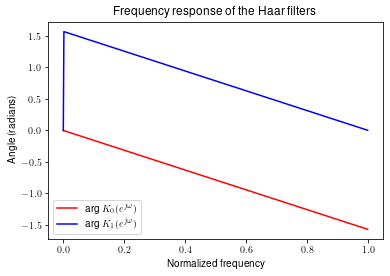

In [8]:
pylab.plot(w0/math.pi, angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1/math.pi, angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Haar filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("haar_phase.svg")
pylab.savefig("haar_phase.pdf")
pylab.show()

## [Daubechies 5](http://wavelets.pybytes.com/wavelet/db5/)

In [9]:
K_0 = get_filter("db5", 2, 10)
K_1 = get_filter("db5", 7, 10)
print("K_0 =", K_0)
print("K_1 =", K_1)

K_0 = [ 0.1601024   0.60382927  0.72430853  0.13842815 -0.24229489 -0.03224487
  0.07757149 -0.00624149 -0.01258075  0.00333573]
K_1 = [ 0.00333573  0.01258075 -0.00624149 -0.07757149 -0.03224487  0.24229489
  0.13842815 -0.72430853  0.60382927 -0.1601024 ]


/home/vruiz/.local/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [10]:
w0, scaling_function = signal.freqz(K_0)
w1, wavelet_function = signal.freqz(K_1)

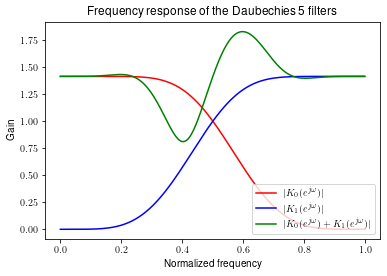

In [11]:
pylab.plot(w0/math.pi, np.abs(scaling_function), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, np.abs(wavelet_function), 'b', label="$|K_1(e^{j\omega})|$")
pylab.plot(w0/math.pi, np.abs(scaling_function + wavelet_function), 'g', label="$|K_0(e^{j\omega})+K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Daubechies 5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Gain")
pylab.savefig("db5_filters_response.svg")
pylab.savefig("db5_filters_response.pdf")
pylab.show()

In [12]:
angles_sf = np.unwrap(np.angle(scaling_function))
angles_wf = np.unwrap(np.angle(wavelet_function))

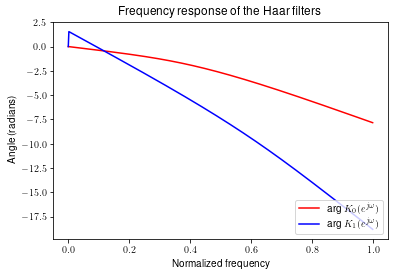

In [13]:
pylab.plot(w0/math.pi, angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1/math.pi, angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Daubechies 5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("haar_phase.svg")
pylab.savefig("haar_phase.pdf")
pylab.show()

## [Biorthogonal 3.5](http://wavelets.pybytes.com/wavelet/bior3.5/)

In [14]:
K_0 = get_filter("bior3.5", 2, 12)
K_1 = get_filter("bior3.5", 18, 24)
print("K_0 =", K_0)
print("K_1 =", K_1)

K_0 = [0.         0.         0.         0.1767767  0.53033009 0.53033009
 0.1767767  0.         0.         0.         0.         0.        ]
K_1 = [ 0.          0.          0.          0.          0.          0.
  0.         -0.01381068 -0.04143204  0.05248058  0.26792718 -0.07181553
 -0.96674755  0.96674755  0.07181553 -0.26792718 -0.05248058  0.04143204
  0.01381068  0.          0.          0.          0.          0.        ]


/home/vruiz/.local/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [15]:
w0, scaling_function = signal.freqz(K_0)
w1, wavelet_function = signal.freqz(K_1)

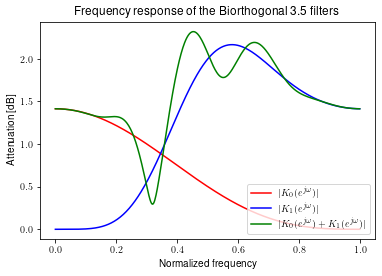

In [16]:
pylab.plot(w0/math.pi, abs(scaling_function), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, abs(wavelet_function), 'b', label="$|K_1(e^{j\omega})|$")
pylab.plot(w0/math.pi, abs(scaling_function + wavelet_function), 'g', label="$|K_0(e^{j\omega})+K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Biorthogonal 3.5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Attenuation [dB]")
pylab.savefig("bior3.5_filters_response.svg")
pylab.savefig("bior3.5_filters_response.pdf")
pylab.show()

In [17]:
angles_sf = np.unwrap(np.angle(scaling_function))
angles_wf = np.unwrap(np.angle(wavelet_function))

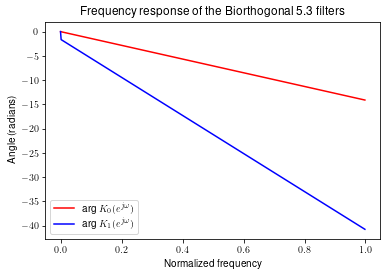

In [19]:
pylab.plot(w0/math.pi, angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1/math.pi, angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [37]:
X = np.ones(512)
x = np.fft.irfft(X)

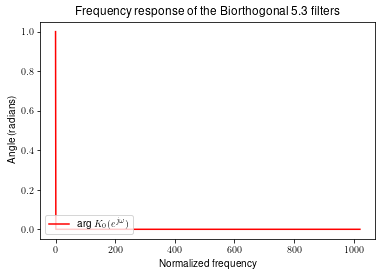

In [39]:
pylab.plot(np.arange(1022), x, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [40]:
wavelet = pywt.Wavelet("bior3.5")
decomposition = pywt.wavedec(x, wavelet=wavelet, level=1, mode="per")
y = pywt.waverec(decomposition, wavelet=wavelet, mode="per")

In [41]:
Y = np.fft.rfft(y)

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


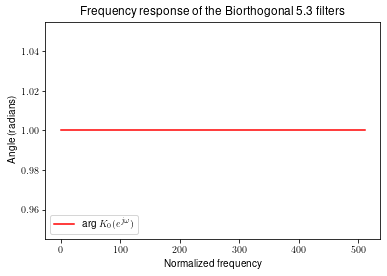

In [43]:
pylab.plot(np.arange(512), Y, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [30]:
x = np.random.random(1024)-0.5
X = np.fft.rfft(x)

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


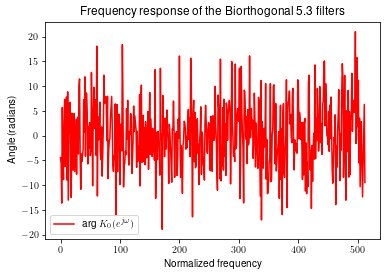

In [31]:
pylab.plot(np.arange(513), X, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [32]:
wavelet = pywt.Wavelet("bior3.5")
decomposition = pywt.wavedec(x, wavelet=wavelet, level=1, mode="per")
y = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
Y = np.fft.rfft(y)

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


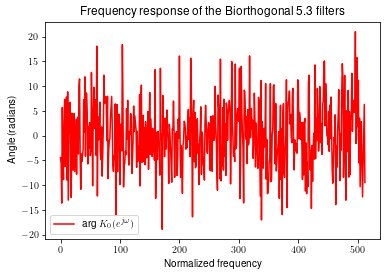

In [33]:
pylab.plot(np.arange(513), Y, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [ ]:
def get_filter(wavelet_name, coef_index, N):
    wavelet = pywt.Wavelet(wavelet_name)
    coefficients = np.zeros(N)
    coefficients[coef_index] = 1
    decomposition = pywt.wavedec(coefficients, wavelet=wavelet, level=1, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    return coefficients

In [ ]:
# http://wavelets.pybytes.com/wavelet/bior3.5/
K_0 = get_filter("bior3.5", 6, 12)
K_1 = get_filter("bior3.5", 22, 48)
print("K_0 =", K_0)
print("K_1 =", K_1)

In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Tahoma']
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], label='test')

ax.legend()
plt.show()